## *Perceptron*.

This project is a part of Udacity Deep Learning project.

### In this notbook we will be implementing perceptron algorithm from scratch with numpy.
> *A perceptron is like a single processing unit which can be used to form a linear classification/decision boundary between different classes.Perceptron is a single layer neural network and a multi-layer perceptron is called Neural Networks.*

![perceptron](perceptron.jpg "Perceptron")

In [62]:

# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
%matplotlib inline

np.random.seed(42)

print("Done Importing")

Done Importing


In [63]:
#importing dataset.
# About dataset: It contains 2-dimentional coordinates (p,q) and label (y) for coordinate where it should lie.

df = pd.read_csv("data.txt",sep=",",names=["p","q","y"])
df.head()

,p,q,y
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


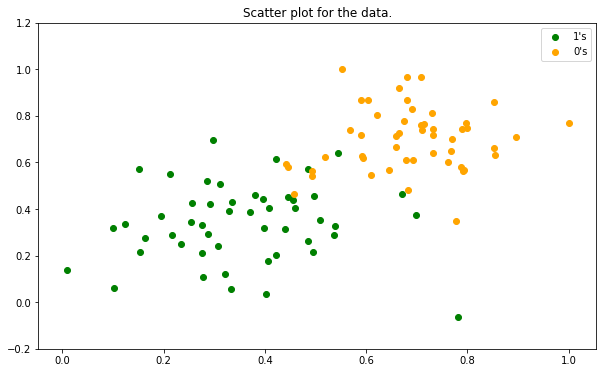

In [64]:
# Visualising our data.

df_p_true = df[df['y']==1]['p']
df_q_true = df[df['y']==1]['q']
df_p_false = df[df['y']==0]['p']
df_q_false = df[df['y']==0]['q']

plt.figure(figsize=(10,6))
plt.scatter(df_p_true,df_q_true,c='green',label="1's")
plt.scatter(df_p_false,df_q_false,c='orange',label="0's")
plt.title("Scatter plot for the data.")
plt.ylim(-0.20,1.20)
plt.legend()
plt.show()

In [65]:
# Here, `step function` is being as an activation function. 
# Step function is simple. if Wx + b > 0 return 1 else 0

def stepFunction(t):
    # t = wx + b 
    return 1 if t >= 0 else 0

In [66]:
# making prediction. 

def prediction(X,W,b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [67]:
# Here we are implementing the function for the ploting out graph.


def plot_points(X, y):

    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'green', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'orange', edgecolor = 'k')
#     plt.figure(figsize=(10,6))

def display(m, b, color='y--'):
#     plt.figure(figsize=(10,6))
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)
#     plt.figure(figsize=(10,6))

In [68]:
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [69]:
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        
        weights, bias = perceptronStep(X, y, W, b, learn_rate)
        
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
#         plt.plot((-W[0]/W[1], -b/W[1]), 'r--', label='classification line')
        display(-weights[0]/weights[1], -bias/weights[1])
    
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    
    plot_points(X, y)
    plt.show()
    

    return boundary_lines

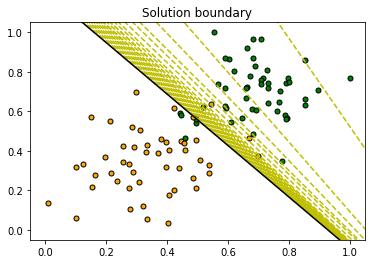

In [70]:

X= df[['p','q']].values
y = df['y'].values
boundryLines = trainPerceptronAlgorithm(X,y)